## Importing the data

In [1]:
import pandas as pd
import pm4py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
o_data = pd.read_csv("event_logs/BPI_Challenge_2019_edited.csv", sep=";")

Over 75% of the event log relates to the sub-process "3-way match, invoice before GR".

In [3]:
len(o_data[o_data["case Item Category"]=="3-way match, invoice before GR"])/len(o_data)*100

75.83376500777014

For the throughput analysis, only the sub-process "3-way match, invoice before GR" and all cases that have been completed by ending on the activity "clear invoice" will be analysed.

In [4]:
data = pd.read_csv("event_logs/filtered_event_log_complete_clear_invoice.csv", sep=";", parse_dates=["event_timestamp"])

In [5]:
data.head()

,case_id,case_PO_id,event_id,event_name,event_timestamp,event_resource,event_value_EUR,case_vendor,case_PR_NPR,case_product_type,case_product_specific
0,4507000266_00010,4507000266,2280627634176,Create Purchase Order Item,2018-02-01 08:53:00+00:00,user_054,134.0,vendorID_0103,PR,Packaging,Labels
1,4507000266_00010,4507000266,2280627634177,Receive Order Confirmation,2018-02-01 10:04:00+00:00,user_029,134.0,vendorID_0103,PR,Packaging,Labels
2,4507000266_00010,4507000266,2280627634178,Record Goods Receipt,2018-03-01 09:20:00+00:00,user_055,134.0,vendorID_0103,PR,Packaging,Labels
3,4507000266_00010,4507000266,2280627634179,Vendor creates invoice,2018-03-01 22:59:00+00:00,NONE,134.0,vendorID_0103,PR,Packaging,Labels
4,4507000266_00010,4507000266,2280627634180,Record Invoice Receipt,2018-04-01 13:15:00+00:00,user_012,134.0,vendorID_0103,PR,Packaging,Labels


Looking at the data at both the higher purchase order, and individual line item level:

In [6]:
PO_data = pd.read_csv("throughput_dataset/PO_dataset.csv")
li_data = pd.read_csv("throughput_dataset/line_item_dataset.csv")

In [7]:
PO_data.head()

,case_PO_id,case_id,start_timestamp,avg_value_EUR,case_vendor,case_PR_NPR,case_product_type,case_product_specific,end_timestamp,throughput,rework_activities,payment_block,automation,avg_vendor_workload,num_items
0,4507000266,4507000266_00010,2018-02-01 08:53:00+00:00,134.0,vendorID_0103,PR,Packaging,Labels,2018-04-26 09:14:00+00:00,84 days 00:21:00,0.0,False,0.0,49.272727,1
1,4507000268,4507000268_00010,2018-02-01 08:56:00+00:00,300.5,vendorID_0105,PR,Packaging,Labels,2018-09-05 12:10:00+00:00,216 days 03:14:00,0.0,False,0.0,13.402778,2
2,4507000272,4507000272_00010,2018-02-01 09:06:00+00:00,769.0,vendorID_0137,NPR,Sales,Products for Resale,2018-09-05 12:12:00+00:00,216 days 03:06:00,0.0,False,25.0,3.647059,2
3,4507000273,4507000273_00010,2018-02-01 09:25:00+00:00,598.5,vendorID_0138,NPR,Sales,Products for Resale,2018-08-03 11:21:00+00:00,183 days 01:56:00,0.0,True,0.0,9.121951,2
4,4507000287,4507000287_00010,2018-02-01 10:17:00+00:00,581.5,vendorID_0148,NPR,Sales,Products for Resale,2018-08-02 12:43:00+00:00,182 days 02:26:00,0.0,True,0.0,3.714286,2


In [8]:
PO_model_data = pd.read_csv("throughput_dataset/PO_modelling_dataset.csv")
li_model_data = pd.read_csv("throughput_dataset/line_item_modelling_dataset.csv")

In [9]:
PO_model_data.head()

,avg_value_EUR,case_vendor,case_PR_NPR,case_product_type,case_product_specific,rework_activities,payment_block,automation,avg_vendor_workload,num_items,throughput
0,134.0,_other_vendor,PR,Packaging,Labels,0.0,0,0.0,49.272727,1,84
1,300.5,_other_vendor,PR,Packaging,Labels,0.0,0,0.0,13.402778,2,216
2,769.0,_other_vendor,_NPR,Sales,Products for Resale,0.0,0,25.0,3.647059,2,216
3,598.5,_other_vendor,_NPR,Sales,Products for Resale,0.0,1,0.0,9.121951,2,183
4,581.5,_other_vendor,_NPR,Sales,Products for Resale,0.0,1,0.0,3.714286,2,182


## Exploring throughput KPIs

What % of cases were completed within 60, 90 or 120 days?

In [10]:
(sum(PO_model_data["throughput"]<=60)/len(PO_model_data))*100

17.356274750785197

In [11]:
(sum(li_model_data["throughput"]<=60)/len(li_model_data))*100

22.26946481510376

In [12]:
(sum(PO_model_data["throughput"]<=90)/len(PO_model_data))*100

42.25044380718285

In [13]:
(sum(li_model_data["throughput"]<=90)/len(li_model_data))*100

47.4684038071462

In [14]:
(sum(li_model_data["throughput"]<=120)/len(li_model_data))*100

67.47542518333593

## Looking at the values of categorical variables

For the later modelling, having too many one-hot encoded features created from the factor levels could cause dimensionality problems. Factor level aggregation is explored instead.

The vendor feature could be aggregated as: the top 5 vendors, and "all other" vendors.

<AxesSubplot:>

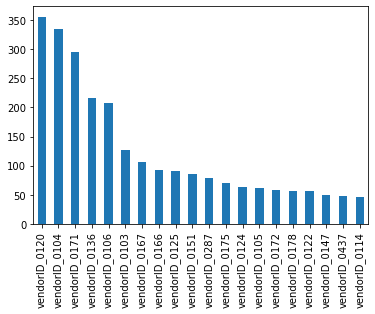

In [15]:
PO_data["case_vendor"].value_counts()[:20].plot.bar()

Categories: "PR", "NPR" + "Other"

<AxesSubplot:>

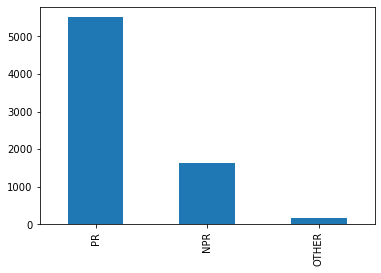

In [16]:
PO_data["case_PR_NPR"].value_counts().plot.bar()

Possible categories: "packaging", "sales", "additives", and "other" (the remaining combined).

<AxesSubplot:>

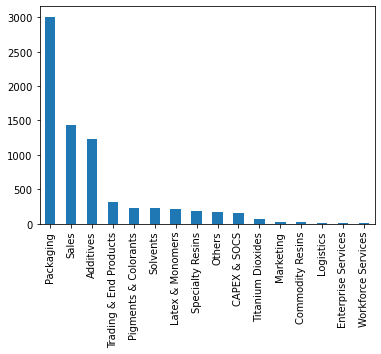

In [17]:
PO_data["case_product_type"].value_counts().plot.bar()

In [18]:
len(PO_data["case_product_type"].unique())

16

Possible categories: "Products for Resale", "Labels", "Containers", "Extenders", "Other".

<AxesSubplot:>

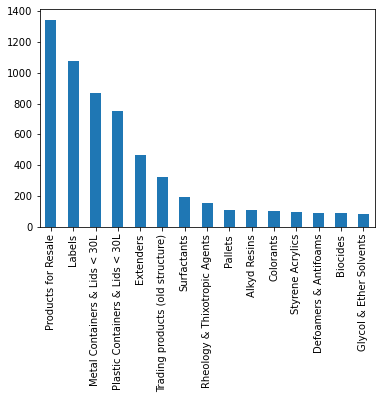

In [19]:
PO_data["case_product_specific"].value_counts()[:15].plot.bar()

In [20]:
len(PO_data["case_product_specific"].unique())

95

## Which vendors tend to sell which products?

Most vendors tend to work in one area only, e.g. most vendors only work packaging, or some work only in additives.    
Not only that, but vendors work only in one very specific area. i.e. 0120: labels. 0106: metal containers and lids.

One vendor, 0171, has more of a range: solvents, additives and pigments.

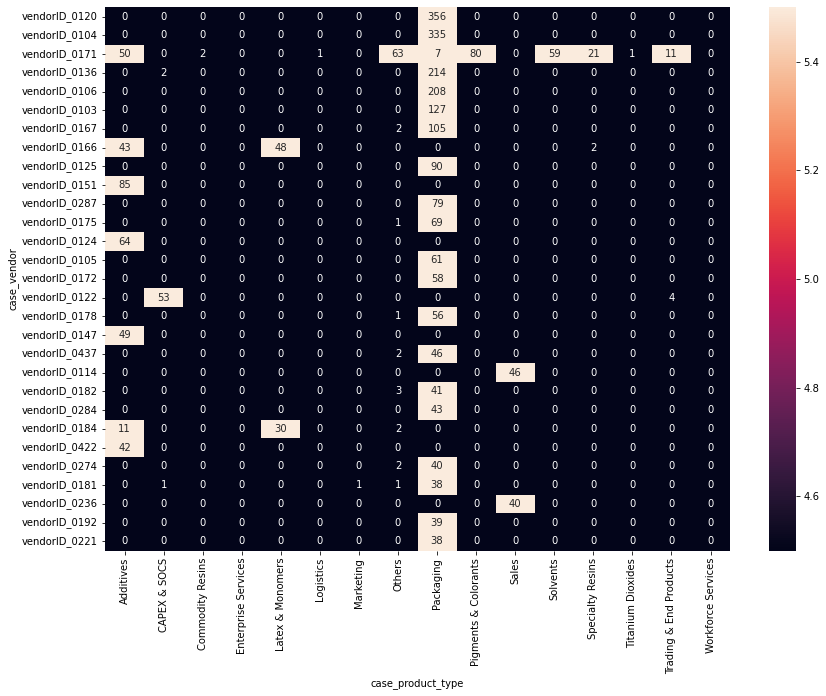

In [21]:
# looking at the purchase order level
plt.figure(figsize=(14, 10))
sns.heatmap(pd.crosstab(PO_data["case_vendor"], PO_data["case_product_type"], margins=True).sort_values("All", ascending=False).head(30).iloc[1:, :].drop("All", axis=1), 
            annot=True, fmt='g', vmin=5, vmax=5);

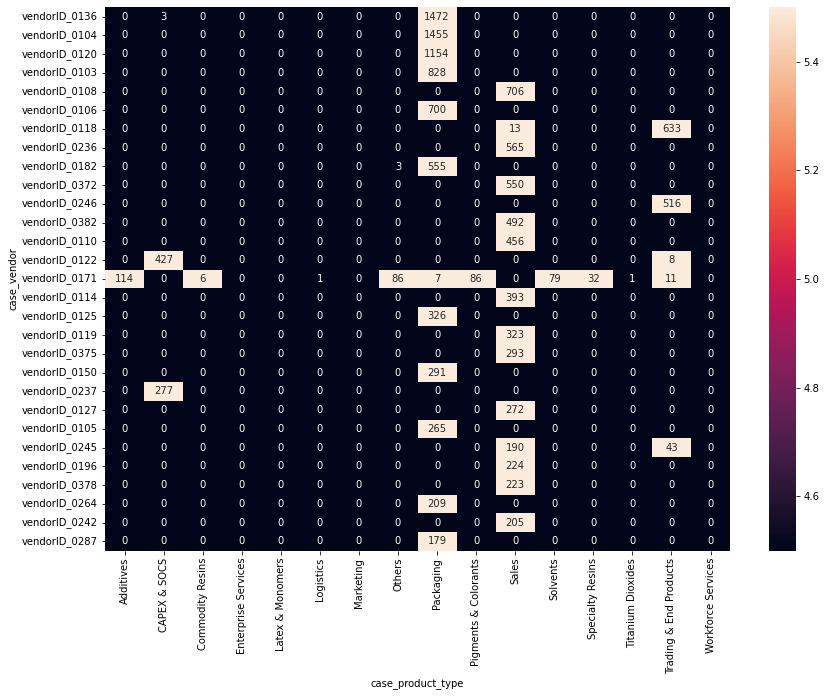

In [22]:
# looking at the line order level
plt.figure(figsize=(14, 10))
sns.heatmap(pd.crosstab(li_data["case_vendor"], li_data["case_product_type"], margins=True).sort_values("All", ascending=False).head(30).iloc[1:, :].drop("All", axis=1), 
            annot=True, fmt='g', vmin=5, vmax=5);

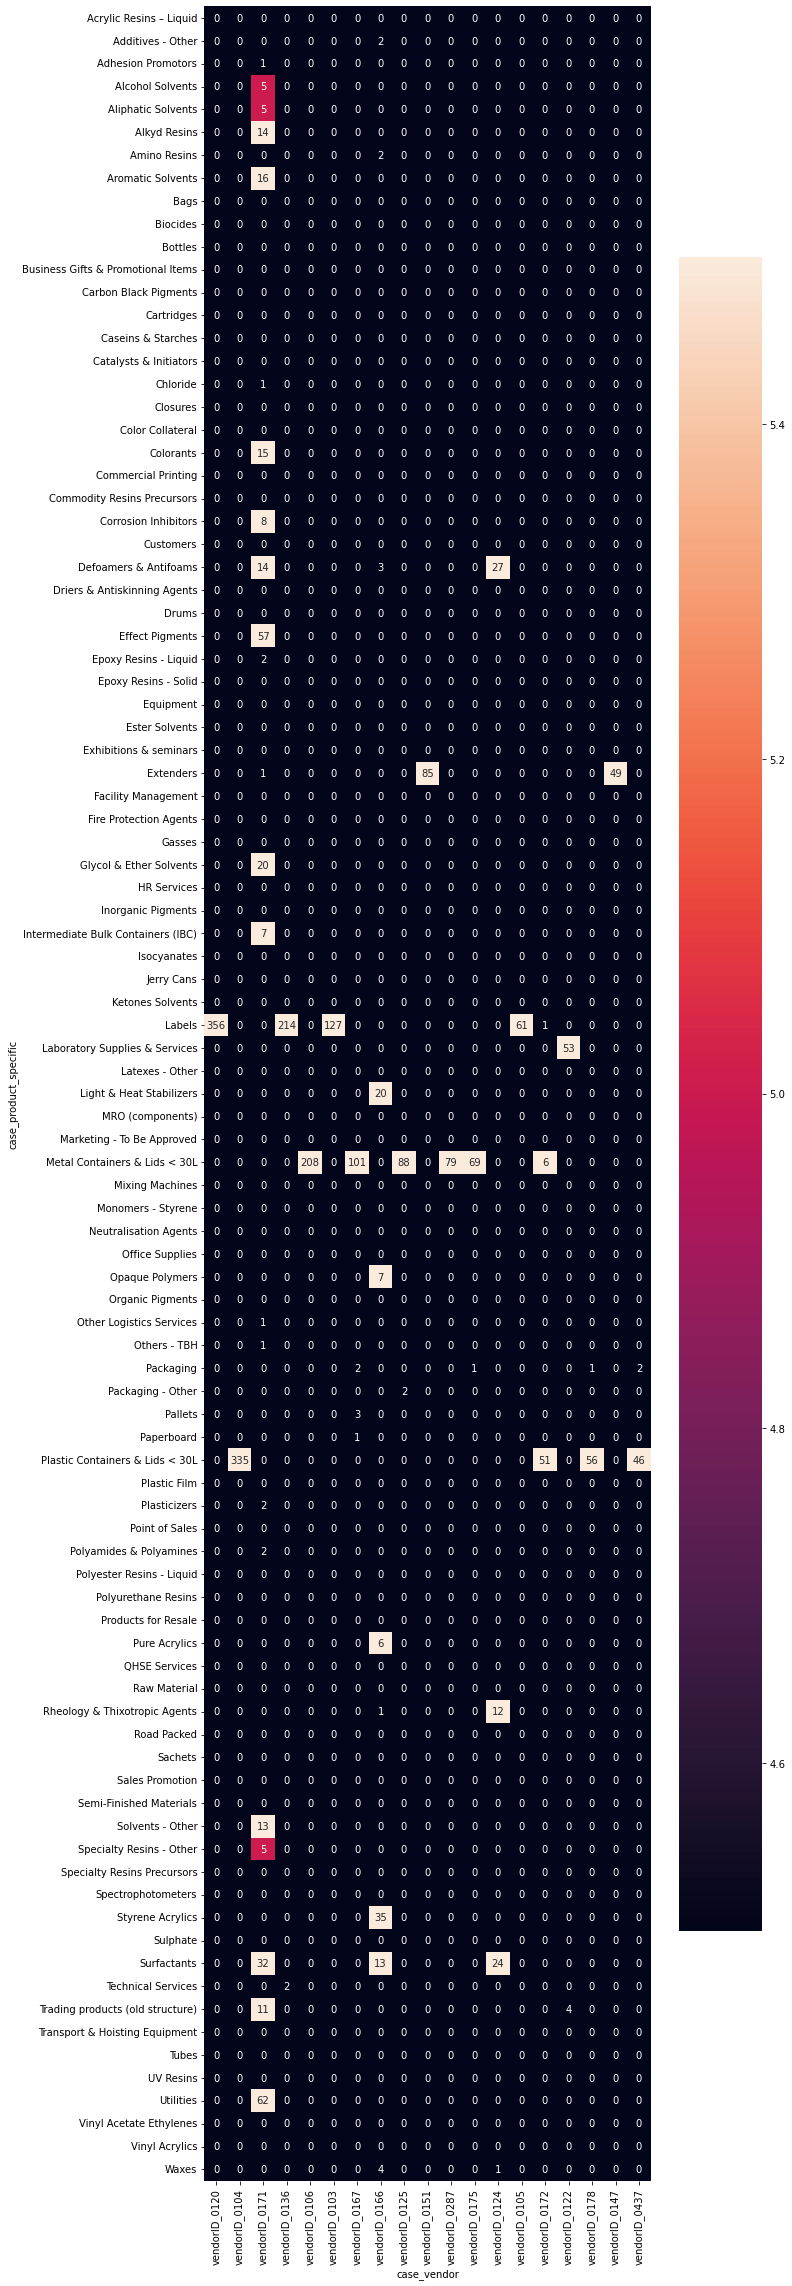

In [23]:
# vendors working in different specific product areas, at the purchase order level
plt.figure(figsize=(10, 40))
sns.heatmap(pd.crosstab(PO_data["case_vendor"], PO_data["case_product_specific"], margins=True).sort_values("All", ascending=False).head(20).iloc[1:, :].drop("All", axis=1).transpose(), 
            annot=True, fmt='g', vmin=5, vmax=5);

## Differences in case attributes between vendors

Do different vendors have different levels of automation?

In [24]:
PO_data.groupby("case_vendor")["automation"].mean().sort_values(ascending=False)[["vendorID_0120", "vendorID_0136", "vendorID_0104", "vendorID_0171", "vendorID_0106"]]

case_vendor
vendorID_0120    25.375869
vendorID_0136     3.341049
vendorID_0104    10.984009
vendorID_0171     3.519774
vendorID_0106     8.794203
Name: automation, dtype: float64

0120 has small variation in throughputs, high automation levels.  
136, 104, 120, all work in the same product type area, but have very different levels of automation.

Do different vendors have different levels of other case attributes? Such as value of orders, % of rework activities, etc.

In [25]:
PO_data.groupby("case_vendor")["avg_value_EUR"].mean()[["vendorID_0120", "vendorID_0136", "vendorID_0104", "vendorID_0171", "vendorID_0106"]]

case_vendor
vendorID_0120     528.630569
vendorID_0136     580.634601
vendorID_0104    2667.436193
vendorID_0171    1121.826102
vendorID_0106    3495.998529
Name: avg_value_EUR, dtype: float64

In [26]:
PO_data.groupby("case_vendor")["rework_activities"].mean()[["vendorID_0120", "vendorID_0136", "vendorID_0104", "vendorID_0171", "vendorID_0106"]]

case_vendor
vendorID_0120    0.081461
vendorID_0136    0.175926
vendorID_0104    0.101493
vendorID_0171    0.067797
vendorID_0106    0.129808
Name: rework_activities, dtype: float64

In [27]:
PO_data.groupby("case_vendor")["avg_vendor_workload"].mean()[["vendorID_0120", "vendorID_0136", "vendorID_0104", "vendorID_0171", "vendorID_0106"]]

case_vendor
vendorID_0120    66.526079
vendorID_0136    66.911805
vendorID_0104    77.192215
vendorID_0171    16.570851
vendorID_0106    33.247203
Name: avg_vendor_workload, dtype: float64

In [28]:
PO_data.groupby("case_vendor")["num_items"].mean()[["vendorID_0120", "vendorID_0136", "vendorID_0104", "vendorID_0171", "vendorID_0106"]]

case_vendor
vendorID_0120    3.241573
vendorID_0136    6.828704
vendorID_0104    4.343284
vendorID_0171    1.444068
vendorID_0106    3.365385
Name: num_items, dtype: float64

## Exploring relationships between throughput and case attributes

Looking at the distribution of throughput:

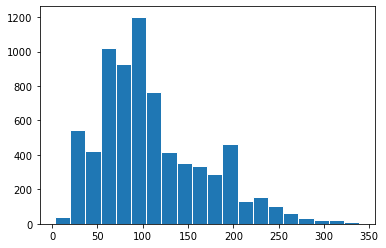

In [29]:
plt.hist(PO_model_data["throughput"], edgecolor="white", bins=20);

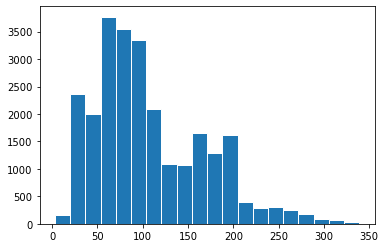

In [30]:
plt.hist(li_model_data["throughput"], edgecolor="white", bins=20);

Check for KPI - % of cases falling within x days

In [31]:
PO_model_data["throughput"].describe()

count    7323.000000
mean      109.724840
std        59.237438
min         3.000000
25%        69.000000
50%        97.000000
75%       142.000000
max       339.000000
Name: throughput, dtype: float64

In [32]:
li_model_data["throughput"].describe()

count    25636.000000
mean       106.583281
std         61.064329
min          3.000000
25%         64.000000
50%         93.000000
75%        145.000000
max        339.000000
Name: throughput, dtype: float64

Looking at the relationship between throughput and the continuous variables:

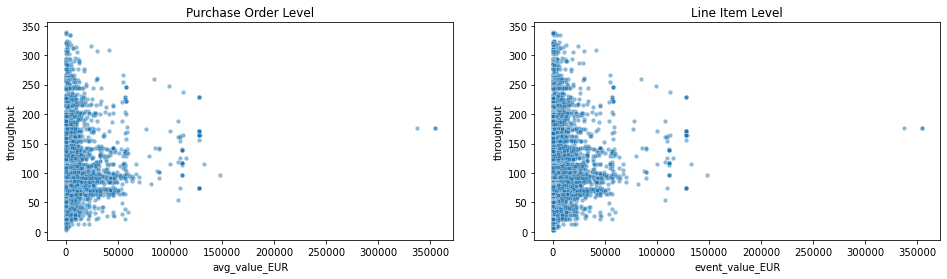

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=PO_model_data, x="avg_value_EUR", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=li_model_data, x="event_value_EUR", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Purchase Order Level"), ax2.set_title("Line Item Level");

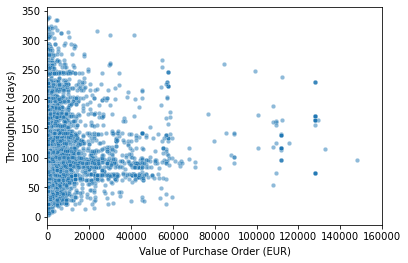

In [34]:
ax = sns.scatterplot(data=PO_model_data, x="avg_value_EUR", y="throughput", s=20, alpha=0.5)
ax.set_xlabel("Value of Purchase Order (EUR)")
ax.set_ylabel("Throughput (days)")
plt.xlim([0, 160000]);

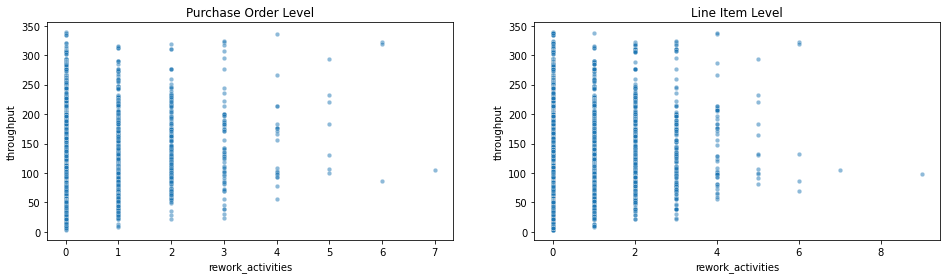

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=PO_model_data, x="rework_activities", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=li_model_data, x="rework_activities", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Purchase Order Level"), ax2.set_title("Line Item Level");

Text(0, 0.5, 'Throughput (days)')

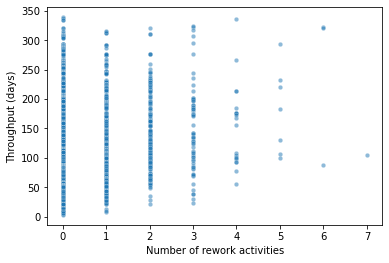

In [36]:
ax = sns.scatterplot(data=PO_model_data, x="rework_activities", y="throughput", s=20, alpha=0.5)
ax.set_xlabel("Number of rework activities")
ax.set_ylabel("Throughput (days)")

There is a large variety of throughput even when no rework, however if there are multiple rework, then tends to increase throughput.

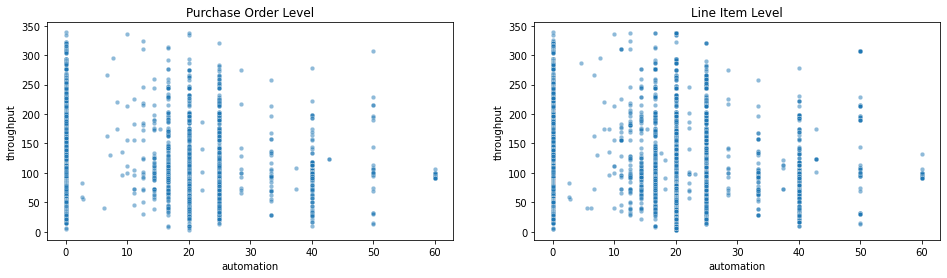

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=PO_model_data, x="automation", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=li_model_data, x="automation", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Purchase Order Level"), ax2.set_title("Line Item Level");

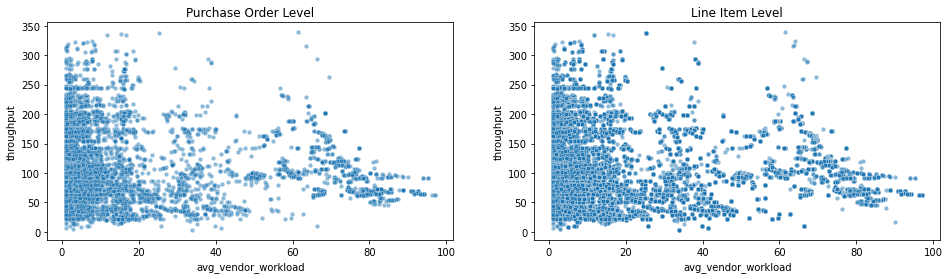

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=PO_model_data, x="avg_vendor_workload", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=li_model_data, x="avg_vendor_workload", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Purchase Order Level"), ax2.set_title("Line Item Level");

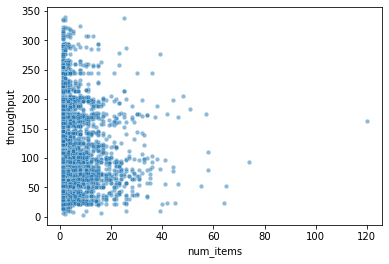

In [39]:
sns.scatterplot(data=PO_model_data, x="num_items", y="throughput", s=20, alpha=0.5);

Looking at the relationship between the categorical variables and throughput:

<AxesSubplot:xlabel='payment_block', ylabel='throughput'>

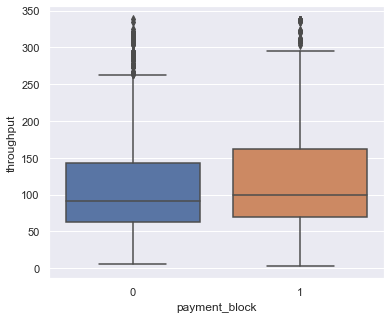

In [40]:
sns.set(rc={"figure.figsize":(6, 5)})
sns.boxplot(data=li_model_data, x="payment_block", y="throughput", order=[0, 1])

<AxesSubplot:xlabel='case_PR_NPR', ylabel='throughput'>

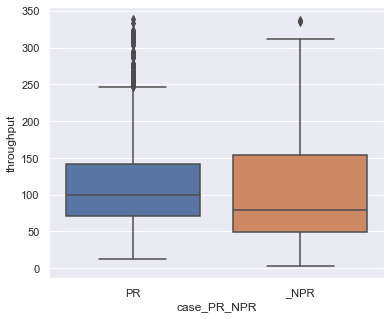

In [41]:
sns.boxplot(data=PO_model_data, x="case_PR_NPR", y="throughput")

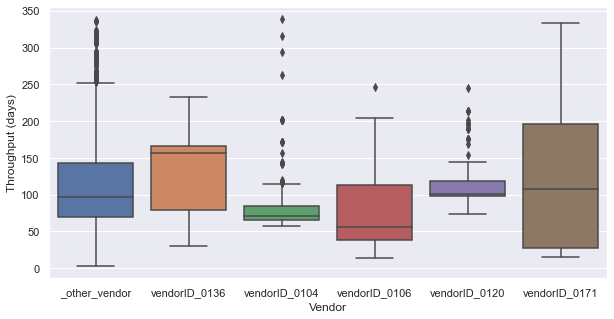

In [42]:
sns.set(rc={"figure.figsize":(10, 5)})
ax=sns.boxplot(data=PO_model_data, x="case_vendor", y="throughput")
ax.set_ylabel("Throughput (days)")
ax.set_xlabel("Vendor");

Is the product types causing the differences to throughput, or the vendor themselves?  
136, 104, 120 all work in packaging, but have different average throughput. Thus suggesting it is the vendors.

Looking at the throughput times for different product types:

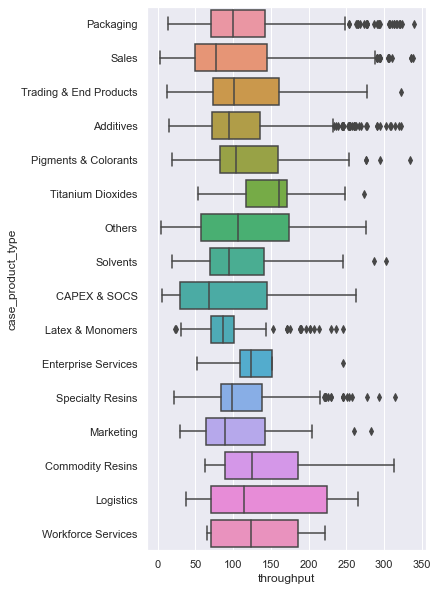

In [43]:
sns.set(rc={"figure.figsize":(5, 10)})
sns.boxplot(y=PO_data["case_product_type"], x=PO_model_data["throughput"]);

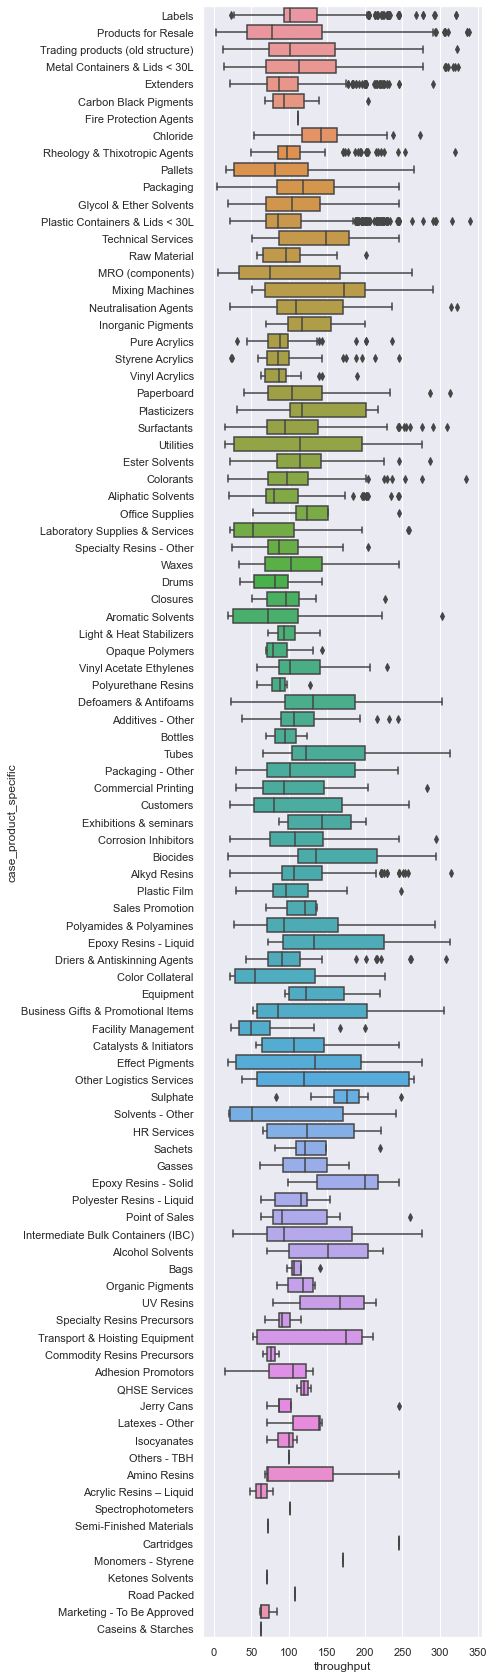

In [44]:
sns.set(rc={"figure.figsize":(5, 30)})
sns.boxplot(y=PO_data["case_product_specific"], x=PO_model_data["throughput"]);

## Correlations between the attributes

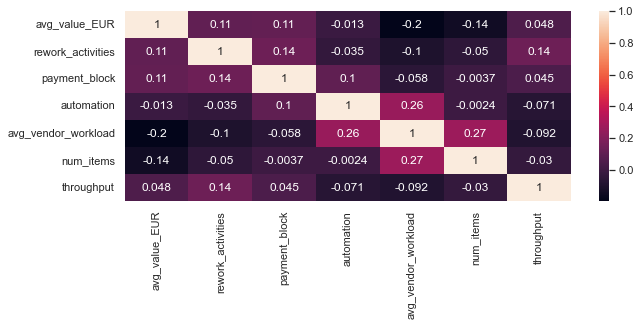

In [45]:
plt.figure(figsize=(10, 3.5))
sns.heatmap(PO_model_data.corr(), annot=True);

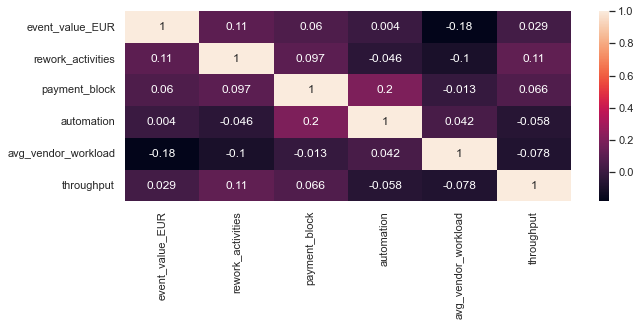

In [46]:
plt.figure(figsize=(10, 3.5))
sns.heatmap(li_model_data.corr(), annot=True);

All features extremely weakly linearly correlated to throughput. The relationships may be much more complex.

## Exploring relationships between attributes for only vendors 0106 and 0171

Exploring only two specific vendors may remove some noise, thus making the relationships between throughput and the case attributes stronger. This will be investigated.

Vendor 0106 represents packaging - only metal containers  
Vendor 0171 represents a variety of different solvents, additives, pigments

In [47]:
package_v = PO_model_data[PO_model_data["case_vendor"]=="vendorID_0106"]

In [48]:
variety_v = PO_model_data[PO_model_data["case_vendor"]=="vendorID_0171"]

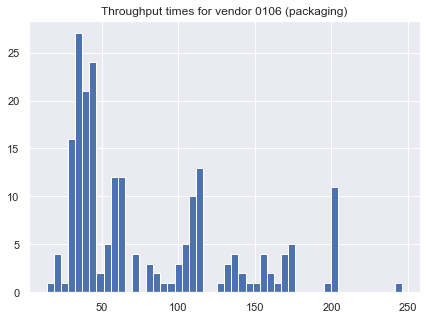

In [49]:
sns.set(rc={"figure.figsize":(7, 5)})
plt.hist(package_v["throughput"], edgecolor="white", bins=50);
plt.title("Throughput times for vendor 0106 (packaging)");

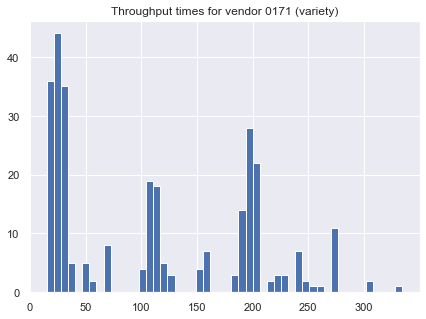

In [50]:
sns.set(rc={"figure.figsize":(7, 5)})
plt.hist(variety_v["throughput"], edgecolor="white", bins=50);
plt.title("Throughput times for vendor 0171 (variety)");

In [51]:
variety_v["throughput"].describe()

count    295.000000
mean     111.440678
std       85.800685
min       15.000000
25%       27.000000
50%      108.000000
75%      195.500000
max      334.000000
Name: throughput, dtype: float64

In [52]:
package_v["throughput"].describe()

count    208.000000
mean      79.336538
std       53.402150
min       14.000000
25%       38.000000
50%       56.500000
75%      113.000000
max      246.000000
Name: throughput, dtype: float64

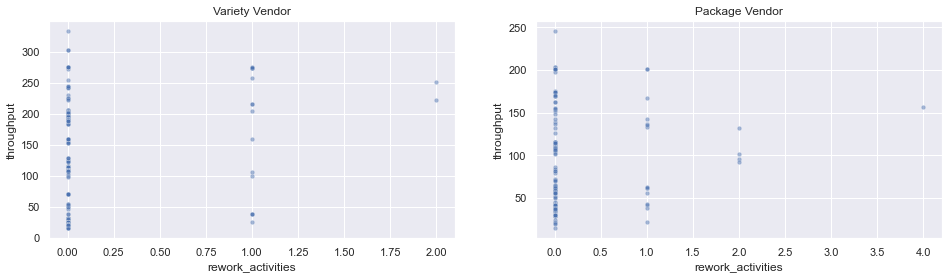

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=variety_v, x="rework_activities", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=package_v, x="rework_activities", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Variety Vendor"), ax2.set_title("Package Vendor");

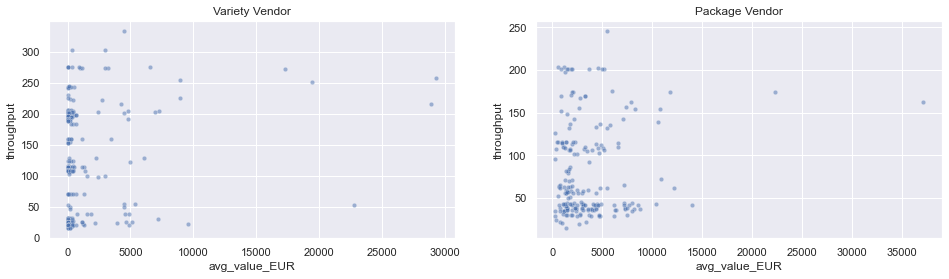

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=variety_v, x="avg_value_EUR", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=package_v, x="avg_value_EUR", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Variety Vendor"), ax2.set_title("Package Vendor");

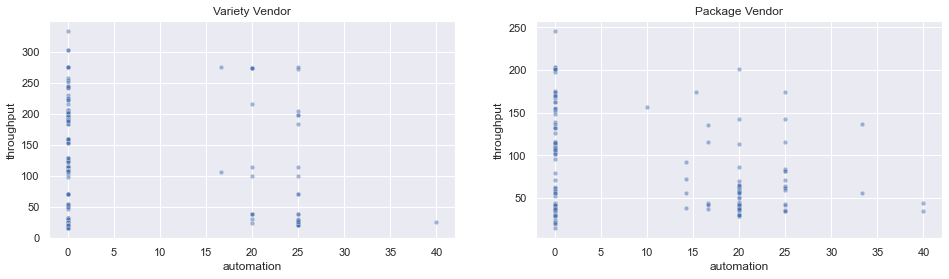

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=variety_v, x="automation", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=package_v, x="automation", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Variety Vendor"), ax2.set_title("Package Vendor");

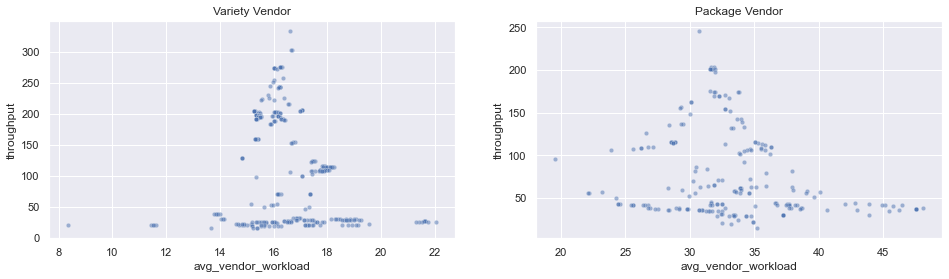

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=variety_v, x="avg_vendor_workload", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=package_v, x="avg_vendor_workload", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Variety Vendor"), ax2.set_title("Package Vendor");

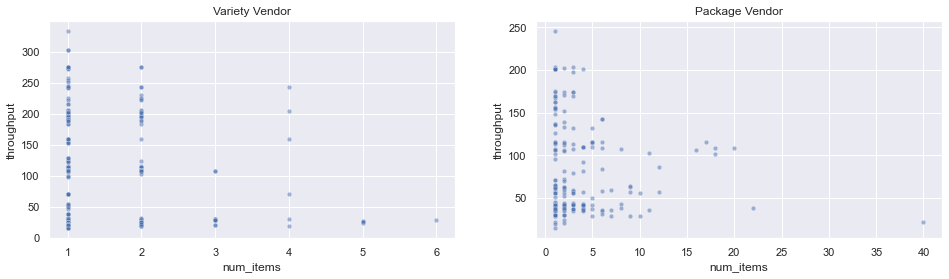

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.scatterplot(data=variety_v, x="num_items", y="throughput", s=20, alpha=0.5, ax=ax1)
sns.scatterplot(data=package_v, x="num_items", y="throughput", s=20, alpha=0.5, ax=ax2)
ax1.set_title("Variety Vendor"), ax2.set_title("Package Vendor");

Seems like at higher number of line items in a purchase order, throughput times are less. Why? More important orders need to be cleared faster? But didn't see same pattern on EUR value!

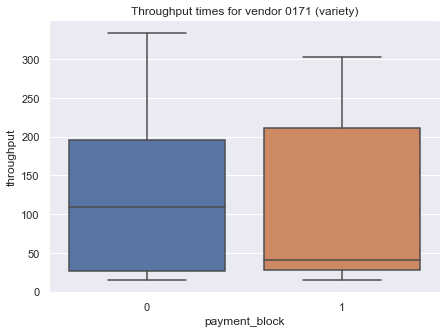

In [58]:
sns.set(rc={"figure.figsize":(7, 5)})
sns.boxplot(data=variety_v, x="payment_block", y="throughput", order=[0, 1])
plt.title("Throughput times for vendor 0171 (variety)");

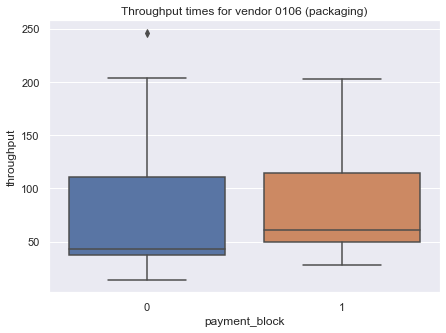

In [59]:
sns.set(rc={"figure.figsize":(7, 5)})
sns.boxplot(data=package_v, x="payment_block", y="throughput", order=[0, 1])
plt.title("Throughput times for vendor 0106 (packaging)");

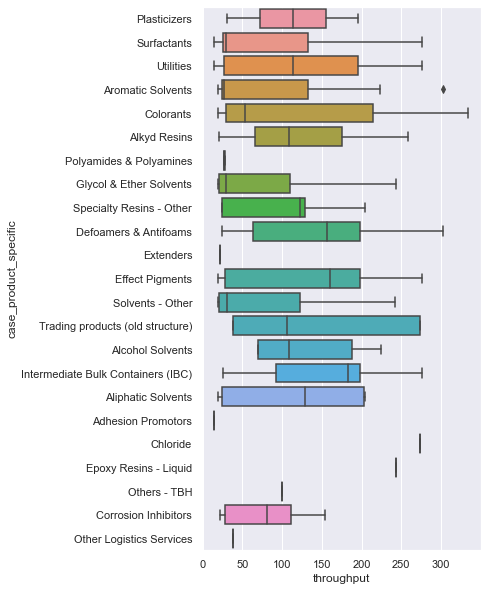

In [60]:
# for variety vendor 0171
sns.set(rc={"figure.figsize":(5, 10)})
sns.boxplot(y=PO_data[PO_data["case_vendor"]=="vendorID_0171"]["case_product_specific"], x=variety_v["throughput"]);

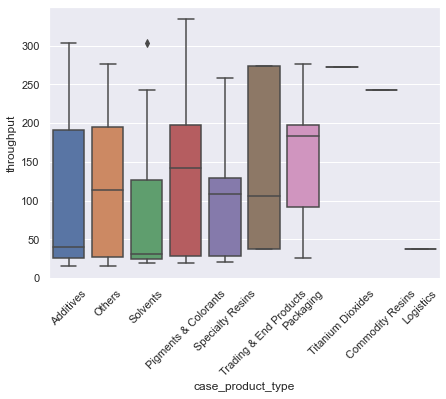

In [61]:
# for variety vendor 0171
sns.set(rc={"figure.figsize":(7, 5)})
sns.boxplot(x=PO_data[PO_data["case_vendor"]=="vendorID_0171"]["case_product_type"], y=variety_v["throughput"])
plt.xticks(rotation=45);

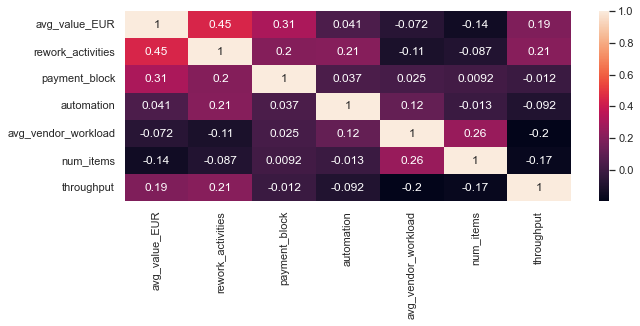

In [62]:
plt.figure(figsize=(10, 3.5))
sns.heatmap(variety_v.corr(), annot=True);

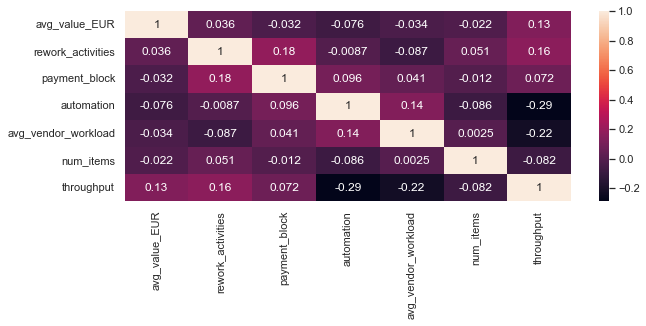

In [63]:
plt.figure(figsize=(10, 3.5))
sns.heatmap(package_v.corr(), annot=True);

There are slightly stronger correlations at vendor level, but still very weak in general.

## On which days do vendors clear the invoices?

Vendors tend to only clear invoices on specific days in a batch method, rather than continuously.  

This is a huge reason why throughput times take so long, and why the other case attributes factors don't seem to have so much of an impact.

<AxesSubplot:>

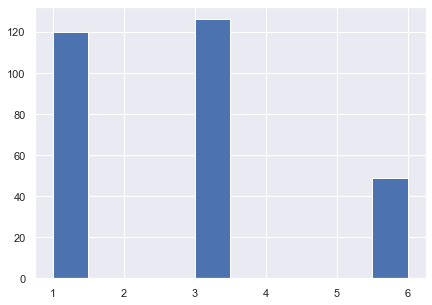

In [64]:
pd.Series([value.weekday() for value in pd.to_datetime(PO_data[PO_data["case_vendor"]=="vendorID_0171"]["end_timestamp"])]).hist()

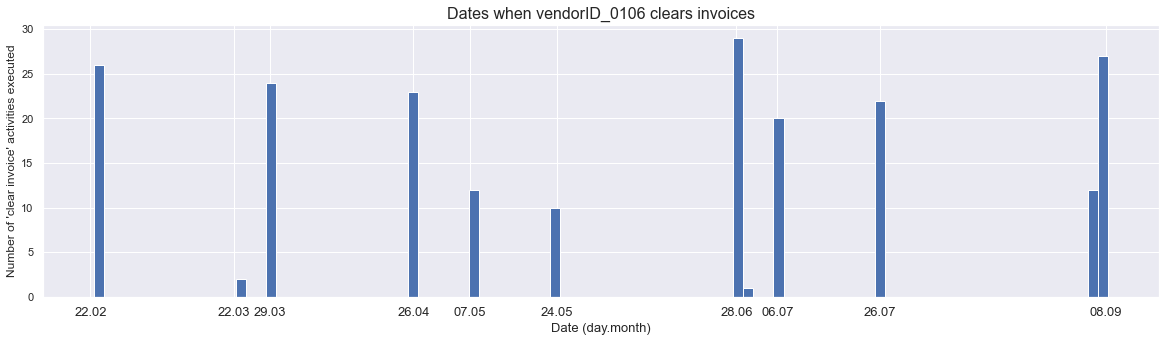

In [65]:
sns.set(rc={"figure.figsize":(20, 5)})
ax = pd.to_datetime(PO_data[PO_data["case_vendor"]=="vendorID_0106"]["end_timestamp"]).hist(bins=100)
plt.xticks(['2018-02-22', '2018-03-22', '2018-03-29', '2018-04-26', '2018-05-07', '2018-05-24', '2018-06-28', '2018-07-06', '2018-07-26', '2018-09-08'], size=13);
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax.set_xlabel("Date (day.month)", size=13)
ax.set_ylabel("Number of \'clear invoice\' activities executed")
ax.set_title("Dates when vendorID_0106 clears invoices", size=16);

In [66]:
pd.to_datetime(PO_data[PO_data["case_vendor"]=="vendorID_0106"]["end_timestamp"]).dt.date.value_counts().reset_index().sort_values("index")

,index,end_timestamp
2,2018-02-22,26
10,2018-03-22,2
3,2018-03-29,24
4,2018-04-26,23
8,2018-05-07,12
9,2018-05-24,10
0,2018-06-28,29
11,2018-06-29,1
6,2018-07-06,20
5,2018-07-26,22


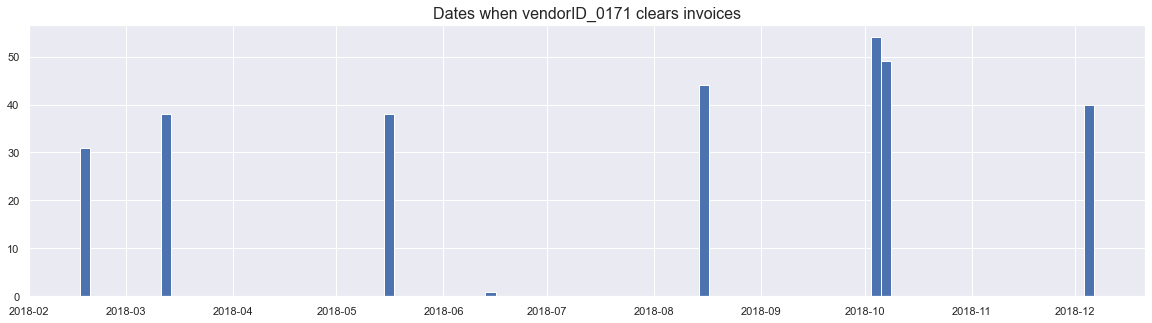

In [67]:
ax = pd.to_datetime(PO_data[PO_data["case_vendor"]=="vendorID_0171"]["end_timestamp"]).hist(bins=100)
ax.set_title("Dates when vendorID_0171 clears invoices", size=16);

In [68]:
pd.to_datetime(PO_data[PO_data["case_vendor"]=="vendorID_0171"]["end_timestamp"]).dt.date.value_counts().reset_index().sort_values("index")

,index,end_timestamp
6,2018-02-15,31
4,2018-03-13,38
5,2018-05-15,38
7,2018-06-14,1
2,2018-08-14,44
0,2018-10-04,54
1,2018-10-07,49
3,2018-12-06,40


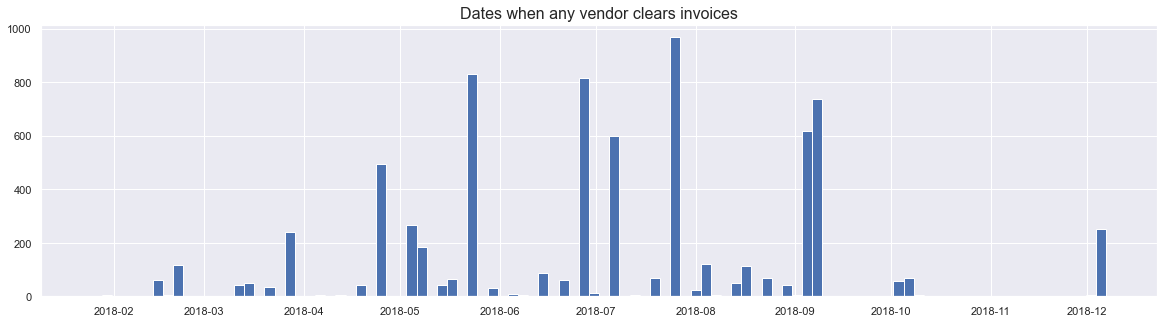

In [69]:
ax = pd.to_datetime(pd.to_datetime(PO_data["end_timestamp"]).dt.date).hist(bins=100);
ax.set_title("Dates when any vendor clears invoices", size=16);